<a href="https://colab.research.google.com/github/Arunimad/CCIR_MLENG/blob/main/TA11_(tutorial)_Predicting_pima_indian_diabetes_using_Pytorch_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction usign Pytorch


PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library.


Why Choose PyTorch for ANNs?

Simplicity and Flexibility: Its intuitive syntax and dynamic nature make PyTorch a favorite among researchers and developers.

Dynamic Computation Graphs: This allows for on-the-fly adjustments to your network, a boon during experimental phases.

Community and Support: PyTorch is backed by a robust community, ensuring a wealth of resources and support.

**Step -1: Dataset and Preprocessing**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Arunimad/CCIR_MLENG/main/diabetes.csv')

**Data Columns **

Number of pregnancies

Glucose

Blood pressure

Skin thickness

Insulin

BMI

Diabetes pedigree function

Age

Outcome (diabetic or non-diabetic)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


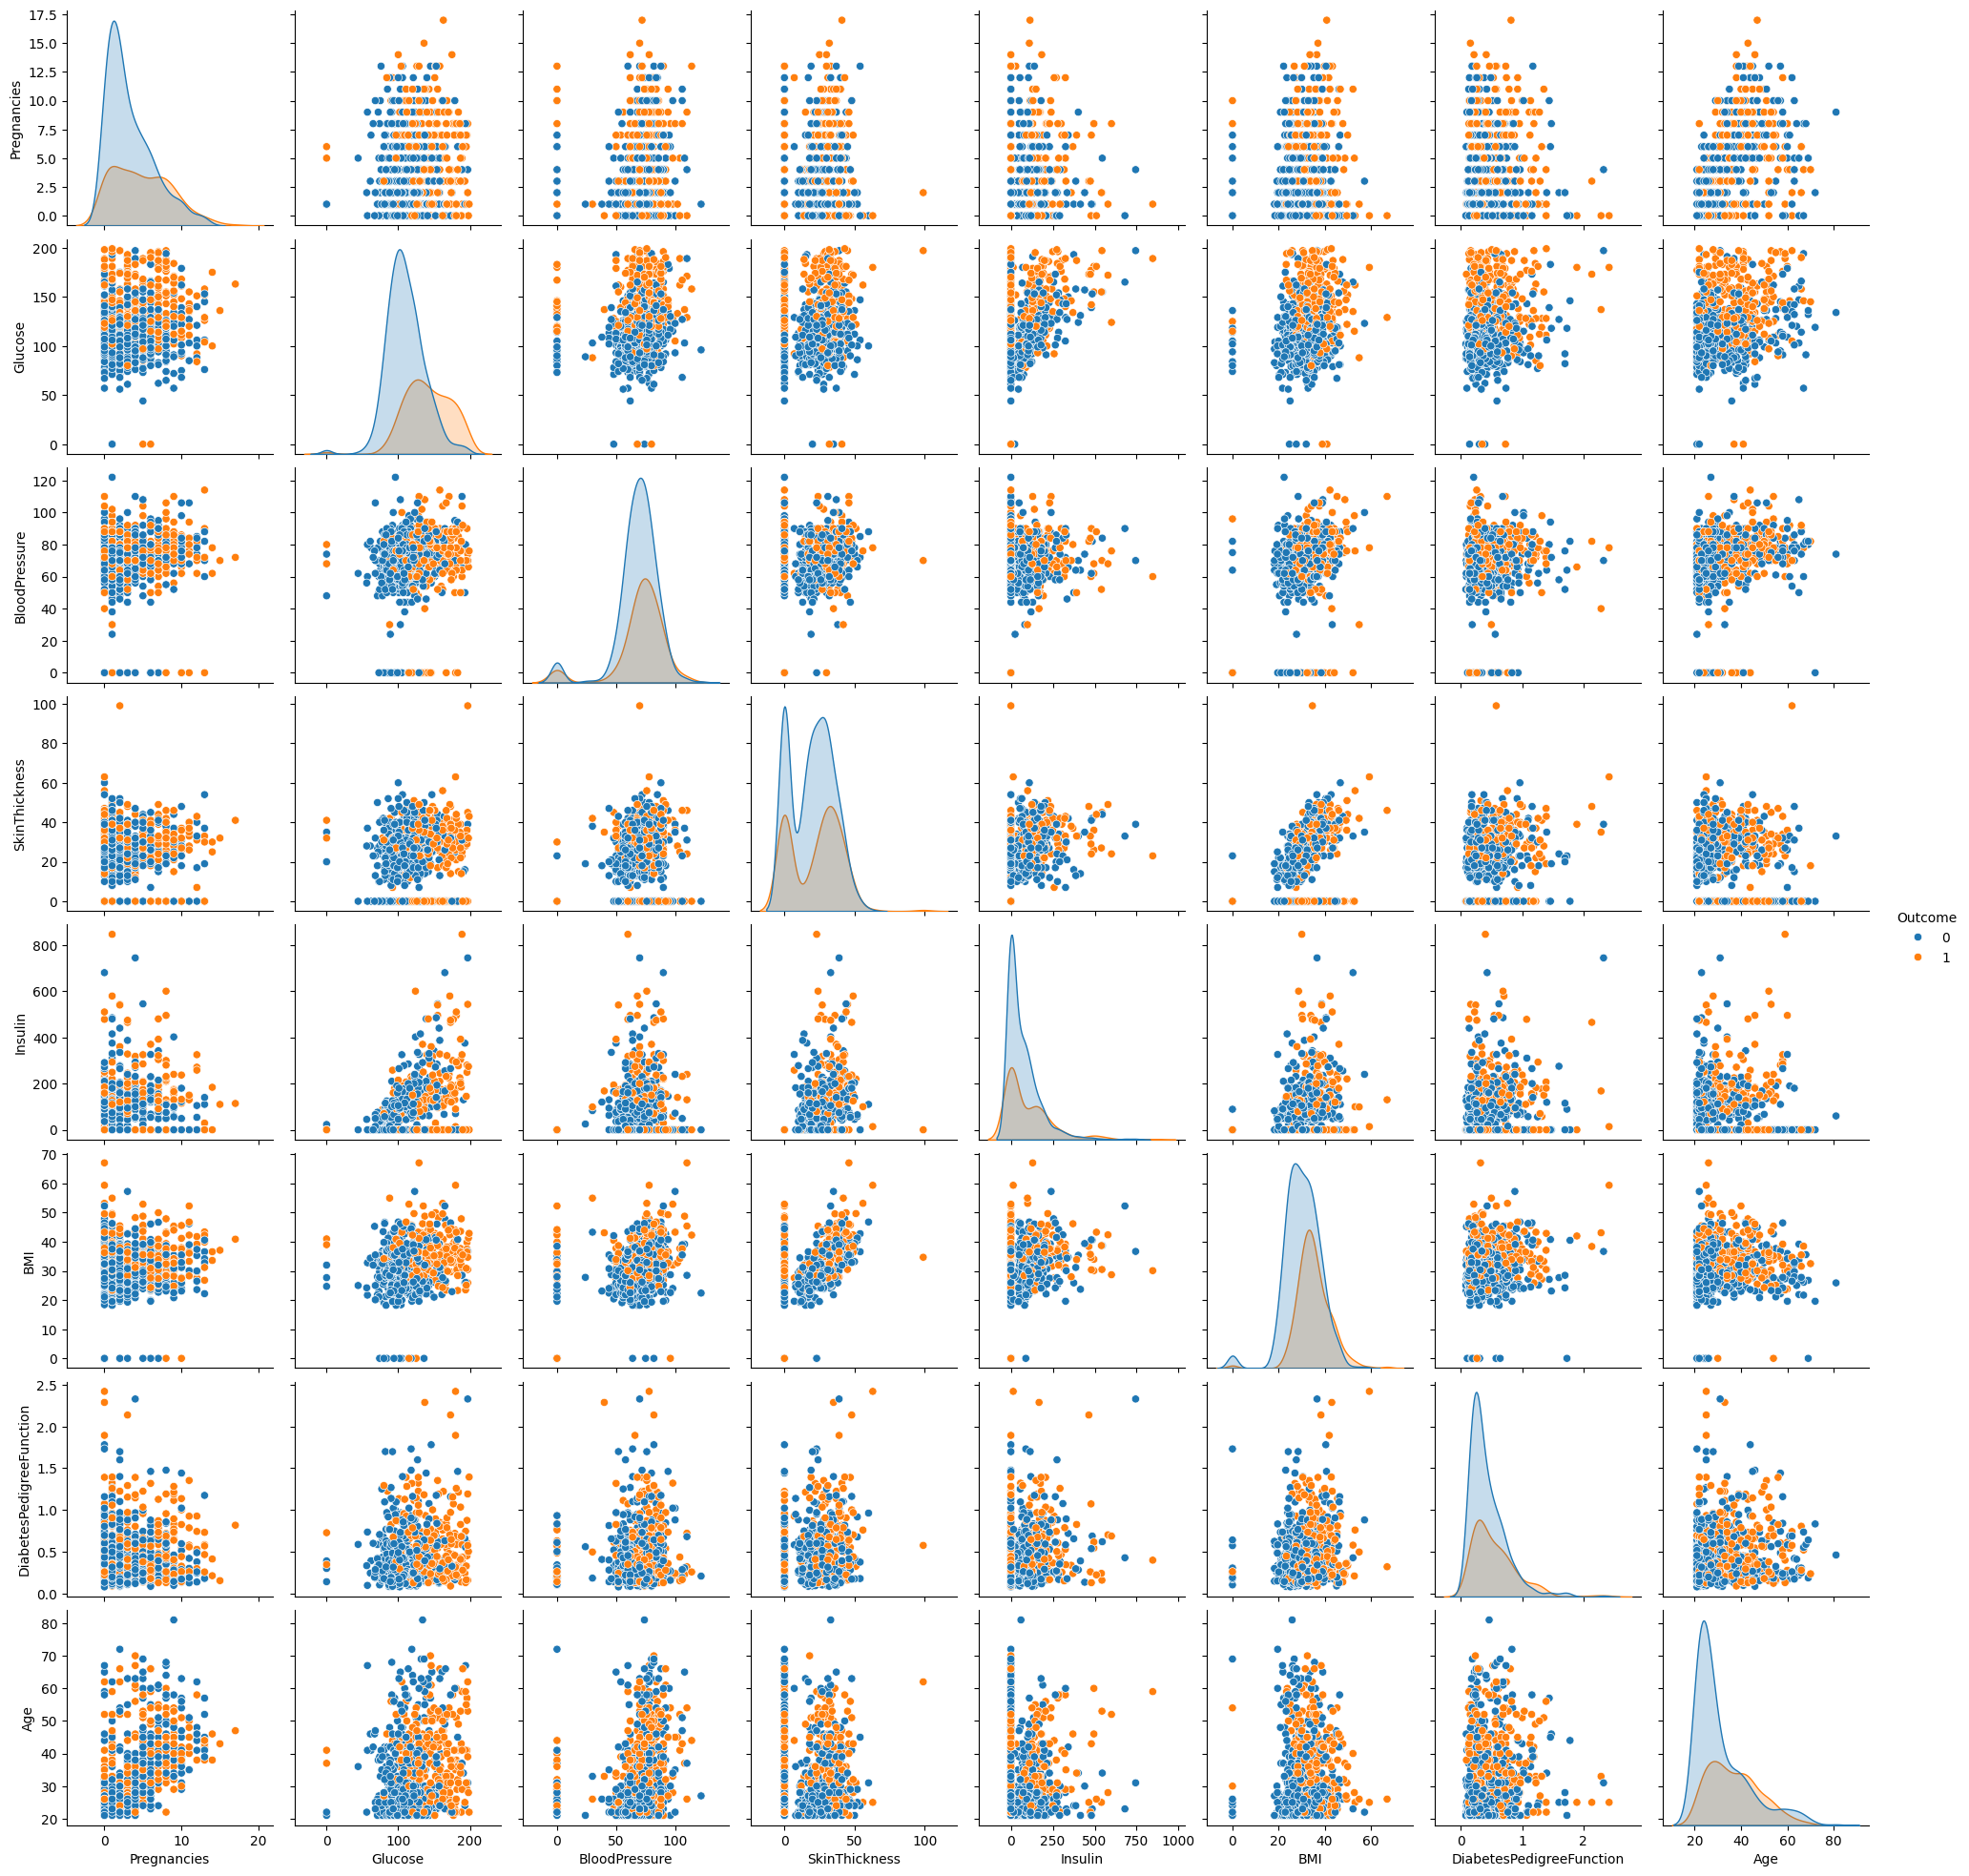

In [6]:
import seaborn as sns
sns.pairplot(df,hue="Outcome")

In [7]:
df.shape


(768, 9)

In [8]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [10]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Feature scaling is performed to normalize or standardized all independent variables. Some variables, such as age and salary are totally on different scales, hence may have a different effect on Euclidean distance (there are many other ways to calculate distance such as Manhattan distance). Therefore, all independent variables should be on the same scale.

Feature scaling is an essential step as there is going to be a lot of computation in ANN and you wouldn’t want any independent variable to dominate on any other variable.    

**Step-2: Defining our ANN architecture**




The DiabetesPredictor class inherits from nn.Module, which is a base class for all neural network modules in PyTorch. We define two hidden layers and an output layer, each with its number of neurons. The forward method specifies how the data flows through the network, using ReLU activation functions for hidden layers and a sigmoid function for the output layer to suit our binary classification task.

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DiabetesPredictor(nn.Module):
    def __init__(self):
        super(DiabetesPredictor, self).__init__()
        self.fc1 = nn.Linear(8, 16)  # 8 features, 16 neurons in first hidden layer
        self.fc2 = nn.Linear(16, 16) # 16 neurons in second hidden layer
        self.output = nn.Linear(16, 1) # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.output(x))
        return x

Hyperparameters

Is there any specific rule or it should be based on trial and error. There is no specific rule to choose a number of units. It is experimentally based. You have to use different hyperparameters. Here, you can see four, based on several trials. There are many functions that may require based on different approaches. In this blog, you will see just two of the unit and activation functions. For a fully connected hidden layer, the rectifier activation function (relu) is used. This rectifier function is mostly suggested to connect hidden layers. Nonetheless, it is good to have a basic understanding of all activation functions, as things may change based on different datasets.  


Adding the output layer in ANN is slightly different than adding a hidden layer. It is important to know the dimension of the output layer. In this dataset, you will be predicting binary variables (0 or 1), hence dimension is one. It means you just need one neuron to predict the final output. Remember, this is an example of a classification approach. Another important change in this layer is the activation function. Here, you can see the use of the sigmoid function, because it not only gives a better prediction than rectifier function but also provide the probabilities. Hence, you will get the prediction that if someone is having diabetes or not, including their probabilities.



**Step-3 Training the model**

Training an ANN in PyTorch involves setting up a loss function, an optimizer, and iterating over the dataset.

We first instantiate our model and define the loss function (Binary Cross Entropy Loss) and optimizer (Adam). The training loop involves iterating over the data for a specified number of epochs. Each iteration includes a forward pass (calculating the output and loss), a backward pass (computing gradients), and an optimization step (updating the model parameters). We also print the loss at regular intervals to monitor the training progress.

In [12]:
model = DiabetesPredictor()
criterion = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 50
for epoch in range(epochs):
    # Convert arrays to tensors
    inputs = torch.tensor(X_train, dtype=torch.float32)
    labels = torch.tensor(y_train, dtype=torch.float32)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels.unsqueeze(1))


    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 0.7202
Epoch [20/50], Loss: 0.7202
Epoch [30/50], Loss: 0.7202
Epoch [40/50], Loss: 0.7202
Epoch [50/50], Loss: 0.7202


Binary Cross Entropy, also known as Binary Log Loss or Binary Cross-Entropy Loss, is a commonly used loss function in machine learning, particularly in binary classification problems. It is designed to measure the dissimilarity between the predicted probability distribution and the true binary labels of a dataset.

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

***Arrays and tensors***

numpy arrays can be 0,1, 2, and even 3 dimensional

When and why do we use tensors instead of numpy arrays?


PyTorch tensors are N Dimensional arrays that hold both the value and the gradient. Numpy arrays are N Dimensional arrays that only hold a value. Use a Tensor when you need to keep track of a gradient.

The difference between a Numpy array and PyTorch tensor is not that great on a mathematical conceptual level, but different frameworks like to implement their own datatypes for versatility and optimisation.


**Step-4: Evaluating the model**






The torch.no_grad() context manager is used to ensure that computations in this block don't track gradients, as we don't need them for evaluation. We calculate the model's accuracy by comparing the predicted class (rounded output of the model) with the actual labels and computing the proportion of correct predictions.



In [13]:
with torch.no_grad():
    y_predicted = model(torch.tensor(X_test, dtype=torch.float32))
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(torch.tensor(y_test).unsqueeze(1)).sum() / float(y_test.shape[0])
    print(f'Accuracy: {acc:.4f}')

Accuracy: 0.2987


Thats good for a start!

# Prediction using KERAS

Let us look at Keras!

Keras is a deep learning API written in Python and capable of running on top of either JAX, TensorFlow, or PyTorch.

In [14]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
from sklearn.model_selection import train_test_split

In [ ]:
#random seed
numpy.random.seed(7)

In [ ]:
# loaded pima indians dataset
dataset = numpy.loadtxt('https://raw.githubusercontent.com/Arunimad/CCIR_MLENG/main/diabetes.csv', delimiter=",", skiprows=1)
print(dataset)

In [ ]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
print("input variables (X)",X)
print("output class variable (Y)",Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

In [ ]:
# calculate predictions
predictions = model.predict(X_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)


In [ ]:
# evaluating the model with Testingset
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Lets touch Backward propogation! (Using Pytorch)


The PyTorch backward pass, also known as backward propagation, is a process used to calculate the gradients of a neural network's parameters for the loss function. You can further use this information to update the parameters in the direction that reduces the loss. You can perform the backward pass by calling the .backward() method on the loss tensor. This recursively propagates the error signal back through the network, layer by layer, calculating the gradient of each parameter along the way.


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Arunimad/CCIR_MLENG/main/diabetes.csv')

X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


import torch
import torch.nn as nn
import torch.nn.functional as F

class DiabetesPredictor(nn.Module):
    def __init__(self):
        super(DiabetesPredictor, self).__init__()
        self.fc1 = nn.Linear(8, 16)  # 8 features, 16 neurons in first hidden layer
        self.fc2 = nn.Linear(16, 16) # 16 neurons in second hidden layer
        self.output = nn.Linear(16, 1) # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.output(x))
        return x


model = DiabetesPredictor()
criterion = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    # Convert arrays to tensors
    inputs = torch.tensor(X_train, dtype=torch.float32)
    labels = torch.tensor(y_train, dtype=torch.float32)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels.unsqueeze(1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.6726
Epoch [20/100], Loss: 0.6622
Epoch [30/100], Loss: 0.6514
Epoch [40/100], Loss: 0.6393
Epoch [50/100], Loss: 0.6256
Epoch [60/100], Loss: 0.6098
Epoch [70/100], Loss: 0.5923
Epoch [80/100], Loss: 0.5736
Epoch [90/100], Loss: 0.5546
Epoch [100/100], Loss: 0.5358


In [16]:
with torch.no_grad():
    y_predicted = model(torch.tensor(X_test, dtype=torch.float32))
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(torch.tensor(y_test).unsqueeze(1)).sum() / float(y_test.shape[0])
    print(f'Accuracy: {acc:.4f}')

Accuracy: 0.7532


What happened in those extra lines?

When you call loss.backward(), all it does is compute gradient of loss w.r.t all the parameters in loss that have requires_grad = True and store them in parameter.grad attribute for every parameter.


optimizer.step() updates all the parameters based on parameter.grad

loss.backward() # do gradient of all parameters for which we set required_grad= True. parameters could be any variable defined in code

optimizer.step() # according to the optimizer function (defined previously in our code), we update those parameters to finally get the minimum loss(error).